In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
import cv2
import glob

In [2]:
import os
path,dir,files = next(os.walk("./images/BrownSpot/"))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  29


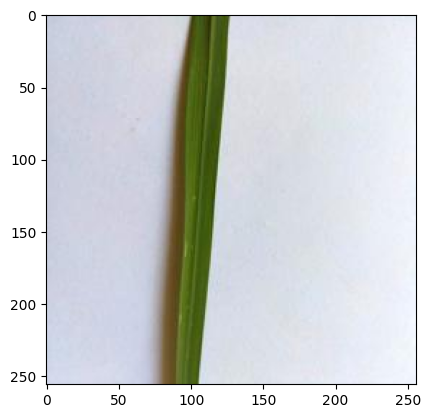

In [3]:
img = mpimg.imread(r'./images/Hispa/shape 315 .jpg')
imgplot = plt.imshow(img)
plt.show()

In [35]:
path,dir,files = next(os.walk("images"))
print(files[0])

BrownSpot0.jpg


In [36]:
black = []
cinder = []
laterite = []
peat = []
yellow = []
for i in range(len(files)):
    print(files[i])
    if files[i][0:5] == 'HISPA':
        black.append(files[i])
    elif files[i][0:7] == 'Healthy':
        cinder.append(files[i])
    elif files[i][0:9] == 'BrownSpot':
        laterite.append(files[i])
    elif files[i][0:9] == 'LeafBlast':
        peat.append(files[i])
print(len(black),len(cinder),len(laterite),len(peat),len(yellow))

BrownSpot0.jpg
BrownSpot1.jpg
BrownSpot10.jpg
BrownSpot11.jpg
BrownSpot12.jpg
BrownSpot13.jpg
BrownSpot14.jpg
BrownSpot15.jpg
BrownSpot16.jpg
BrownSpot17.jpg
BrownSpot18.jpg
BrownSpot19.jpg
BrownSpot2.jpg
BrownSpot20.jpg
BrownSpot21.jpg
BrownSpot22.jpg
BrownSpot23.jpg
BrownSpot24.jpg
BrownSpot25.jpg
BrownSpot26.jpg
BrownSpot27.jpg
BrownSpot3.jpg
BrownSpot4.jpg
BrownSpot5.jpg
BrownSpot6.jpg
BrownSpot7.jpg
BrownSpot8.jpg
BrownSpot9.jpg
Healthy0.jpg
Healthy1.jpg
Healthy10.jpg
Healthy11.jpg
Healthy12.jpg
Healthy13.jpg
Healthy14.jpg
Healthy15.jpg
Healthy16.jpg
Healthy17.jpg
Healthy18.jpg
Healthy19.jpg
Healthy2.jpg
Healthy20.jpg
Healthy21.jpg
Healthy22.jpg
Healthy23.jpg
Healthy24.jpg
Healthy25.jpg
Healthy26.jpg
Healthy27.jpg
Healthy28.jpg
Healthy29.jpg
Healthy3.jpg
Healthy30.jpg
Healthy31.jpg
Healthy32.jpg
Healthy4.jpg
Healthy5.jpg
Healthy6.jpg
Healthy7.jpg
Healthy8.jpg
Healthy9.jpg
HISPA0.jpg
HISPA1.jpg
HISPA10.jpg
HISPA11.jpg
HISPA12.jpg
HISPA13.jpg
HISPA14.jpg
HISPA15.jpg
HISPA16.jpg
HISP

In [38]:
# os.mkdir('images_resized')
original_path = './images'
new_path = 'compressed_images/'

os.mkdir(new_path)

In [39]:
from PIL import Image
import os, sys

def resize_rename_rotate(srcdir,srcfile, targetdir="", size=(224,224)):
  src_path = srcdir+srcfile

  targetfile = os.path.splitext(srcfile)
  extension = os.path.splitext(srcfile)[1]
     
  if srcfile != targetfile:
     try :
         im = Image.open(src_path)
         im = im.rotate(90)
         im = im.resize(size) 
         im.save(targetdir+targetfile[0]+'__'+".jpg")
     except IOError as io:
         print ("cannot change image for ", srcfile)

if __name__=="__main__":
  targetdir = "compressed_images1/"
  srcdir = "compressed_images/"

  for file in os.listdir(srcdir):
     resize_rename_rotate(srcdir,file,targetdir)

In [40]:
for i in range(len(files)):
    filename = os.listdir(path)[i]
    f_img = path+"/"+filename
    img = Image.open(f_img)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    new_img_path = new_path+'/'+filename
    img.save(new_img_path)

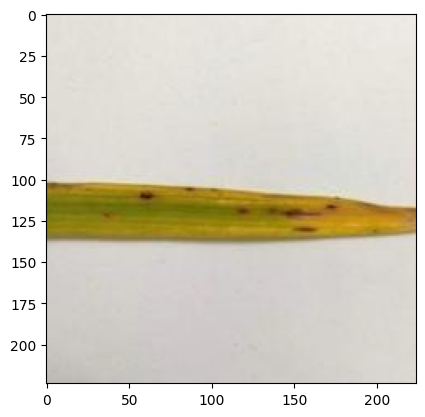

In [41]:
img = mpimg.imread(r'compressed_images/BrownSpot22.jpg')
imgplot = plt.imshow(img)
plt.show()

In [42]:
image_directory = 'compressed_images/'
image_extensions = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]
soil_images = np.asarray([cv2.imread(file) for file in files])

In [43]:
soil_images.shape

(123, 224, 224, 3)

In [44]:
filenames = os.listdir('compressed_images/')

In [45]:
labels = []
for i in range(0,len(filenames)):
    files = filenames[i]    
    if files[0:5] == 'HISPA':
        labels.append(0)
    elif files[0:7] == 'Healthy':
        labels.append(1)
    elif files[0:9] == 'BrownSpot':
        labels.append(2)
    elif files[0:9] == 'LeafBlast':
        labels.append(3)
print(len(labels))

123


In [46]:
labels.count(0), labels.count(1),labels.count(2), labels.count(3),labels.count(4)

(29, 33, 28, 33, 0)

In [47]:
X = soil_images
Y = np.asarray(labels)

In [48]:
Y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=35,stratify=Y)

In [50]:
Y_train.shape,Y_test.shape

((98,), (25,))

In [51]:
X_train_scaled = X_train/255

In [52]:
X_test_scaled = X_test/255

In [53]:
import tensorflow_hub as hub

In [54]:
mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobile_net_model,input_shape=(224,224,3),trainable=False)

In [55]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout


In [56]:
number_of_classes = 5

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(5,activation='softmax'))
model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 4,227,141
Trainable params: 1,969,157
Non-

In [57]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [58]:
history = model.fit(X_train_scaled,Y_train,epochs=20,validation_split=0.25,batch_size=16)

Epoch 1/20


c:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 8s 475ms/step - loss: 1.8134 - acc: 0.3014 - val_loss: 2.4353 - val_acc: 0.2400
Epoch 2/20
5/5 [==============================] - 2s 308ms/step - loss: 1.1074 - acc: 0.5616 - val_loss: 1.1987 - val_acc: 0.4800
Epoch 3/20
5/5 [==============================] - 1s 280ms/step - loss: 0.7912 - acc: 0.7397 - val_loss: 1.0759 - val_acc: 0.5200
Epoch 4/20
5/5 [==============================] - 1s 283ms/step - loss: 0.4823 - acc: 0.8630 - val_loss: 1.2109 - val_acc: 0.4800
Epoch 5/20
5/5 [==============================] - 1s 281ms/step - loss: 0.2592 - acc: 0.9041 - val_loss: 1.1516 - val_acc: 0.5600
Epoch 6/20
5/5 [==============================] - 1s 281ms/step - loss: 0.1824 - acc: 0.9315 - val_loss: 1.3567 - val_acc: 0.6000
Epoch 7/20
5/5 [==============================] - 1s 279ms/step - loss: 0.1104 - acc: 0.9589 - val_loss: 1.5982 - val_acc: 0.6000
Epoch 8/20
5/5 [==============================] - 1s 294ms/step - loss: 0.1067 - acc: 0.9452 - val_lo

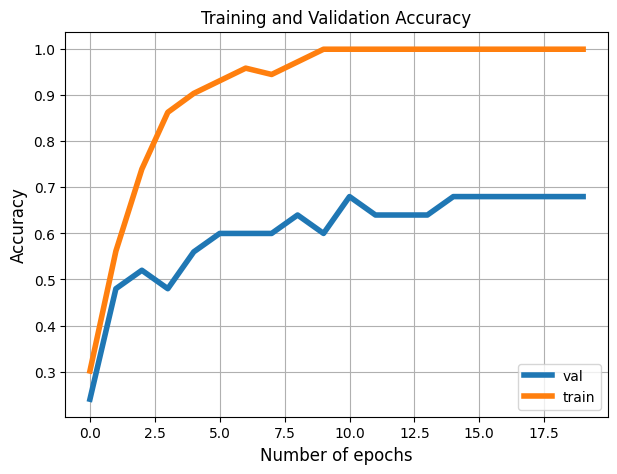

In [59]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_acc'],linewidth = 4)
plt.plot(history.history['acc'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

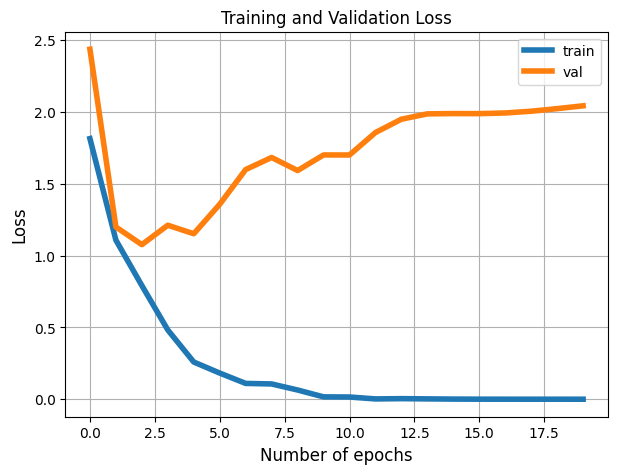

In [60]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [61]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print("Test Loss = ",score)
print("Test Acc = ",acc)

1/1 [==============================] - 0s 402ms/step - loss: 1.7705 - acc: 0.6400
Test Loss =  1.7705105543136597
Test Acc =  0.6399999856948853


1/1 [==============================] - 3s 3s/step
1
Healthy


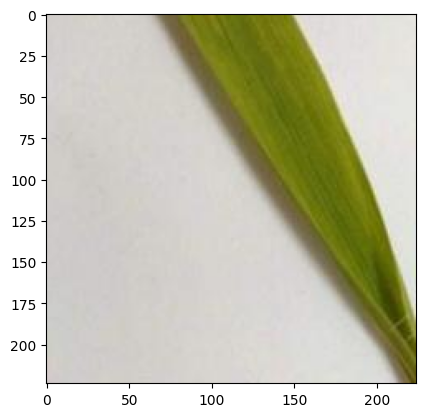

In [62]:
img_test = cv2.imread('./compressed_images/Healthy0.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread('./compressed_images/Healthy0.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

# if input_label == 0:
#     print("Black Soil")
# elif input_label == 1:
#     print("Cinder Soil")
# elif input_label == 2:
#     print("Laterite Soil")
# elif input_label == 3:
#     print("Peat Soil")
# elif input_label == 4:
#     print("Yellow Soil")
if input_label == 0:
    print("HISPA")
elif input_label == 1:
    print("Healthy")
elif input_label == 2:
    print("BrownSpot")
elif input_label== 3:
    print('LeafBlast')

In [67]:
model.save('my_model1')

INFO:tensorflow:Assets written to: my_model1\assets


INFO:tensorflow:Assets written to: my_model1\assets


In [64]:
from tensorflow.keras.models import load_model

In [65]:
load_models = load_model('my_model.h5',custom_objects={'KerasLayer':hub.KerasLayer})